In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 选择图片和标签数据
target = 3
data_name = ['0618', '0854', '1066'][target - 1]
# img_path = f'../input_data/{data_name}.png'  # 原图路径
# output_features_filename = f'./Features/{data_name}_PCA_features.npy'  # 数据输出路径
# output_labels_filename = f'./Features/{data_name}_PCA_labels.npy'  # 数据输出路径

# img = cv2.imread(img_path)
# image = img.reshape(-1, 3) #BGR
# print(image.shape)
# print(type(image))

In [3]:
csv_path = f'../RGB_data/UniformSampler_{data_name}_3x3_multi_labelme.csv'  
output_features_filename = f'./Features/{data_name}_PCA3x3_features.npy'  # 数据输出路径
output_labels_filename   = f'./Features/{data_name}_PCA3x3_labels.npy'  # 数据输出路径
output_img = f'./img/{data_name}_PCA3x3_img.png'

data = pd.read_csv(csv_path)
print(data.shape)
print(type(data))
# 最后一列是标签，前27列是特征
X = data.iloc[:, :-1].values  # 特征数据
y = data.iloc[:, -1].values   # 标签数据

(1250, 28)
<class 'pandas.core.frame.DataFrame'>


In [4]:
# scaler = StandardScaler()
# image_scaled = scaler.fit_transform(image)

# pca = PCA(n_components='mle', svd_solver='full')

# image_pca = pca.fit_transform(image_scaled)
# print(image_pca.shape)
# print(type(image_pca))
# print(image_pca)

# # 获取PCA的主成分个数
# n_components = pca.n_components_

# # 初始化标签数组
# labels = np.zeros(image_pca.shape[0], dtype=int)  # 用于存储每个样本的标签

# # 遍历所有主成分并生成标签
# for i in range(n_components):
#     pca_component = image_pca[:, i]
    
#     # 使用中位数作为阈值划分标签
#     threshold = np.median(pca_component)
    
#     # 如果主成分值大于阈值，标签为1，否则为0
#     labels += (pca_component > threshold).astype(int) * (2 ** i)  # 每个主成分的标签通过不同的位加权

# # 确保标签值在合理范围内
# labels = np.clip(labels, 0, 2**n_components - 1)
# print(lab
# # 保存PCA特征和标签
# np.save(output_features_filename, image_pca)
# np.save(output_labels_filename, labels)

# print(f'PCA选择的主成分个数: {n_components}')
# print(f'生成的标签数量: {len(np.unique(labels))}')

降维后的特征形状: (1250, 26)
主成分个数: 26


TypeError: savefig() missing 1 required positional argument: 'fname'

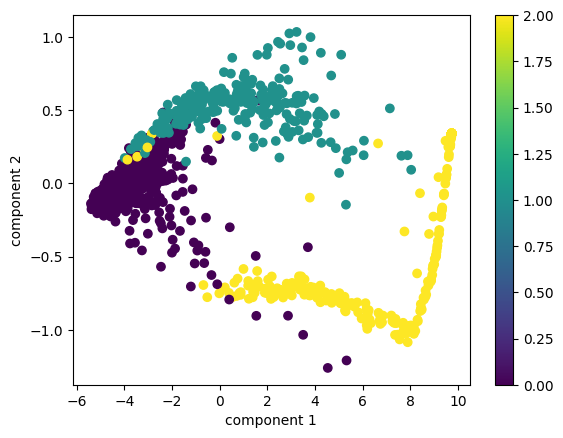

In [5]:
# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用PCA进行降维
pca = PCA(n_components='mle', svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

print(f"降维后的特征形状: {X_pca.shape}")
print(f"主成分个数: {pca.n_components_}")

# 保存PCA降维后的特征和标签
np.save(output_features_filename, X_pca)
np.save(output_labels_filename, y)

# 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.xlabel('component 1')
plt.ylabel('component 2')
# plt.title('PCA')
plt.savefig()
plt.show()

# # # 3D
# # 可视化PCA降维后的数据（3D图）
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # 绘制3D散点图，使用标签颜色区分
# scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')

# # 添加标签和标题
# ax.set_xlabel('主成分 1')
# ax.set_ylabel('主成分 2')
# ax.set_zlabel('主成分 3')
# ax.set_title('PCA降维后的3D数据')

# # 添加颜色条
# fig.colorbar(scatter)

# # 显示图形
# plt.show()